In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
from sklearn.utils import shuffle

In [2]:
warnings.filterwarnings("ignore")
x0 = np.random.multivariate_normal([3,0],[[1,0],[0,1]],800)
y0 = np.zeros([800,1])
x1 = np.random.multivariate_normal([1,6],[[1,0],[0,1]],800)
y1 = np.ones([800,1])
x2 = np.random.multivariate_normal([5,6],[[1,0],[0,1]],800)
y2 = 2*np.ones([800,1])
Enconder= preprocessing.OneHotEncoder()
Enconder.fit([[0],[1],[2]])
print(Enconder.transform(y0).toarray()[0:2])
print(Enconder.transform(y1).toarray()[0:2])
print(Enconder.transform(y2).toarray()[0:2])

[[1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 1. 0.]]
[[0. 0. 1.]
 [0. 0. 1.]]


In [3]:
X = np.concatenate((x0,x1,x2))
print(X.shape)
y = np.concatenate((y0,y1,y2))
Y = Enconder.transform(y).toarray()
print(Y.shape)
X,Y,y = shuffle(X,Y,y)
print(X[0:5],Y[0:5])

(2400, 2)
(2400, 3)
[[-0.91740698  5.44810012]
 [ 2.22581151  7.24130277]
 [ 1.9991314   5.82736428]
 [-0.21335532  4.38612345]
 [ 5.03946908  4.58923922]] [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


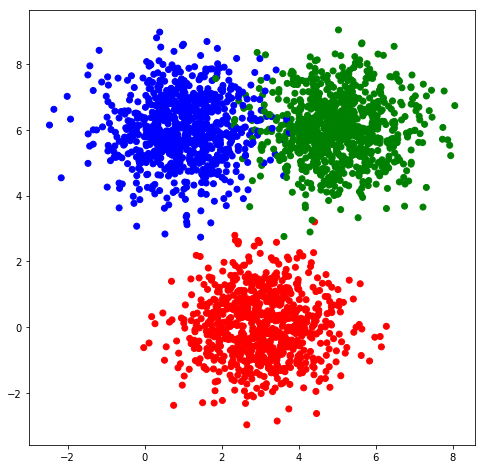

In [4]:
colors = ['r' if l == 0 else 'b' if l== 1 else 'g' for l in y[:]]
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c = colors)
plt.show()

In [5]:
x = tf.placeholder(dtype=tf.float32,shape= [None,2])
y = tf.placeholder(dtype=tf.float32,shape =[None,3])

In [6]:
W1 = tf.Variable(initial_value=tf.random_normal([2,3],mean=0,stddev=0.1),name = "W1")
B1 = tf.Variable(initial_value=tf.zeros([3]),name = "B1")

In [7]:
pred = tf.nn.softmax(tf.matmul(x,W1)+B1)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
opti = tf.train.AdamOptimizer(0.04).minimize(cost)
yTrue = tf.equal(tf.arg_max(pred,1),tf.arg_max(y,1))
accu = tf.reduce_mean(tf.cast(yTrue,tf.float32))

Instructions for updating:
Use `argmax` instead


In [8]:
init = tf.global_variables_initializer()
saver = tf.train.Saver(max_to_keep=2)
batch_size = 30
epochs = 50
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        for inter in range(80):
            _,loss,accuracy = sess.run([opti,cost,accu],feed_dict = {x:X[inter*batch_size:(inter+1)*batch_size,:],y:Y[inter*batch_size:(inter+1)*batch_size]})
            if inter % 79 == 0 and inter != 0:
                print("inter:{0},loss:{1},accu:{2}".format(inter*(epoch+1),loss,accuracy))
                saver.save(sess,"threeCategorySave/inter.ckpt",global_step = inter*(epoch+1))

inter:79,loss:0.5949983596801758,accu:1.0
inter:158,loss:0.5797439217567444,accu:1.0
inter:237,loss:0.5745319128036499,accu:0.9666666388511658
inter:316,loss:0.5718212723731995,accu:0.9666666388511658
inter:395,loss:0.5702053308486938,accu:0.9666666388511658
inter:474,loss:0.5691826939582825,accu:0.9666666388511658
inter:553,loss:0.5685211420059204,accu:0.9666666388511658
inter:632,loss:0.5680928826332092,accu:0.9666666388511658
inter:711,loss:0.5678190588951111,accu:0.9666666388511658
inter:790,loss:0.5676480531692505,accu:0.9666666388511658
inter:869,loss:0.5675451159477234,accu:0.9666666388511658
inter:948,loss:0.5674869418144226,accu:0.9666666388511658
inter:1027,loss:0.5674579739570618,accu:0.9666666388511658
inter:1106,loss:0.5674481987953186,accu:0.9666666388511658
inter:1185,loss:0.5674512386322021,accu:0.9666666388511658
inter:1264,loss:0.5674630403518677,accu:0.9666666388511658
inter:1343,loss:0.5674811005592346,accu:0.9666666388511658
inter:1422,loss:0.5675039887428284,accu:

INFO:tensorflow:Restoring parameters from threeCategorySave/inter.ckpt-3950


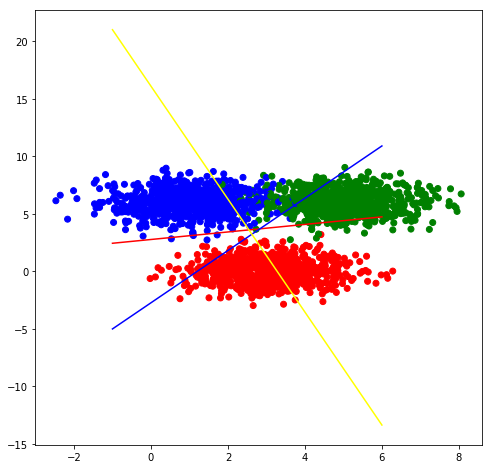

In [10]:
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess,"threeCategorySave/inter.ckpt-3950")
    plt.figure(figsize=(8,8))
    plt.scatter(X[:,0],X[:,1],c = colors)
    xx = np.linspace(-1,6,200)
    yy1 =-xx*(sess.run(W1)[0][0]/sess.run(W1)[1][0])-sess.run(B1)[0]/sess.run(W1)[1][0]
    yy2 =-xx*(sess.run(W1)[0][1]/sess.run(W1)[1][1])-sess.run(B1)[1]/sess.run(W1)[1][1]
    yy3 =-xx*(sess.run(W1)[0][2]/sess.run(W1)[1][2])-sess.run(B1)[2]/sess.run(W1)[1][2]
    plt.plot(xx,yy1,c = "red")
    plt.plot(xx,yy2,c = "blue")
    plt.plot(xx,yy3,c= "yellow")
    plt.show()